In [81]:
import sys
# !{sys.executable} -m pip install opencv-python
# !{sys.executable} -m pip install scikit-image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.svm import SVC

In [82]:
import cv2
from skimage.feature import hog
import os

In [83]:
current_folder_path=os.getcwd()
image_folder_path=os.path.join(current_folder_path,'image')
image_folder_path

'c:\\Users\\NTCUONG\\data_science\\image'

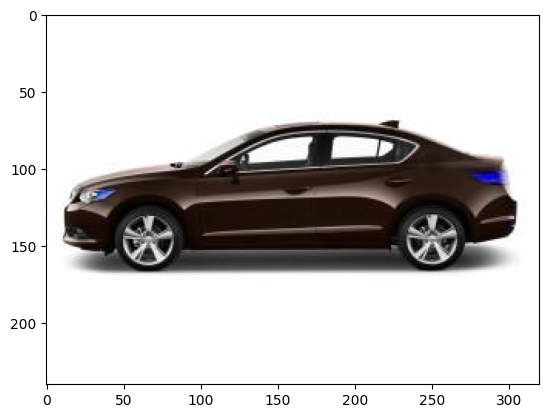

In [84]:
image_path_list=[]
for image_path in os.listdir(image_folder_path):
    image_path_list.append(os.path.join(image_folder_path,image_path))
img=cv2.imread(image_path_list[1])
plt.imshow(img);

In [85]:
# img = np.array(img)
img = cv2.cvtColor(cv2.resize(img,(96,64)),cv2.COLOR_RGB2GRAY)
img = hog(img,orientations=9,pixels_per_cell=(16,16),
              cells_per_block=(2,2)
             )

In [86]:
img.shape

(540,)

In [87]:
# #MAKE Y
# len(image_path_list)
# Y=np.ones((len(image_path_list),),float)
# Y=list(Y)
# type(Y)


In [88]:
hog_list=[]

for image_path in image_path_list:
    if len(hog_list) == 701:
        break
    image=cv2.imread(image_path)
    image = cv2.cvtColor(cv2.resize(image,(96,64)),cv2.COLOR_RGB2GRAY)
    hog_feature = hog(image,orientations=9,pixels_per_cell=(16,16),
              cells_per_block=(2,2)
             )
    hog_list.append(hog_feature)
hog_list

[array([0.21523382, 0.0980659 , 0.23497759, 0.18290434, 0.24920453,
        0.24920453, 0.19046945, 0.13300218, 0.13666803, 0.11053847,
        0.09832176, 0.2095003 , 0.21825651, 0.24920453, 0.24920453,
        0.09511419, 0.12956977, 0.1182245 , 0.16907214, 0.05048202,
        0.12653295, 0.1094624 , 0.11981576, 0.18434632, 0.20617425,
        0.11267517, 0.14435725, 0.09005031, 0.06304517, 0.09383739,
        0.18203319, 0.18210376, 0.2294782 , 0.13304066, 0.18203883,
        0.08314569, 0.10541594, 0.09376537, 0.19979171, 0.20814215,
        0.25880996, 0.25880996, 0.09070644, 0.1235653 , 0.11274579,
        0.25292372, 0.15033907, 0.22289318, 0.18203401, 0.25880996,
        0.15753149, 0.09443626, 0.07652897, 0.13351665, 0.08587723,
        0.06012355, 0.08948881, 0.17359748, 0.17366478, 0.21884381,
        0.12687534, 0.17360286, 0.07929258, 0.05935931, 0.03012002,
        0.10730158, 0.23128487, 0.25880996, 0.25880996, 0.18307717,
        0.08651292, 0.09370018, 0.24408412, 0.14

In [89]:
Y=np.ones(len(hog_list,),float)
len(Y)

701

In [90]:
os.getcwd()

'c:\\Users\\NTCUONG\\data_science'

In [91]:
dog_folder_path=os.path.join(os.getcwd(),'dog')
dog_folder_path

'c:\\Users\\NTCUONG\\data_science\\dog'

In [92]:
dog_image_path_list=[]
test_path=os.path.join(dog_folder_path,'test')
train_path=os.path.join(dog_folder_path,'train')
for dog_name in os.listdir(test_path):
    dog_image_path_list.append(os.path.join(test_path,dog_name))

In [93]:
Y=list(Y)
for dog_image_path in dog_image_path_list:
    for tail_image_path in os.listdir(dog_image_path):
        image_fake=cv2.imread(os.path.join(dog_image_path,tail_image_path))
#         image_fake=cv2.imread(image_path)
#         plt.imshow(image_fake)
        image_real = cv2.cvtColor(cv2.resize(image_fake,(96,64)),cv2.COLOR_RGB2GRAY)
#         plt.imshow(image_fake)
        hog_feature = hog(image_real,orientations=9,pixels_per_cell=(16,16),
              cells_per_block=(2,2)
             )
        hog_list.append(hog_feature)
        Y.append(float(0))


In [94]:
X=np.array(hog_list)
X.shape

(1401, 540)

In [95]:
Y=np.array(Y)
Y.shape

(1401,)

In [96]:
model=SVC(kernel = 'linear', C = 1e5)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1234)
x_test

array([[0.11861624, 0.04356515, 0.24492129, ..., 0.10865537, 0.15983447,
        0.16697278],
       [0.20267764, 0.21360266, 0.21360266, ..., 0.0379463 , 0.02392095,
        0.04700471],
       [0.07275722, 0.00193457, 0.03789545, ..., 0.02085381, 0.02583435,
        0.02889614],
       ...,
       [0.01337017, 0.02299527, 0.02753372, ..., 0.24073822, 0.24073822,
        0.24073822],
       [0.01663865, 0.01009396, 0.02697206, ..., 0.        , 0.00232533,
        0.02007175],
       [0.0783724 , 0.0497135 , 0.05770151, ..., 0.05411371, 0.08781766,
        0.08632042]])

In [97]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=precision_score(y_test,y_pred)
acc



0.967741935483871

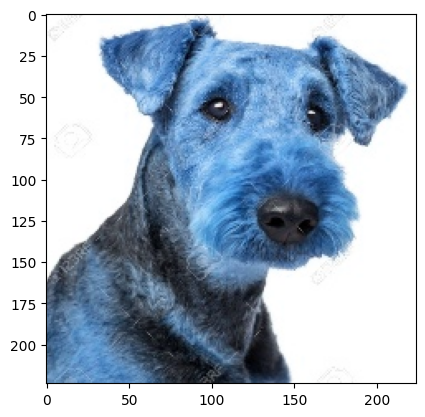

In [98]:
dog_image_test=cv2.imread(r'C:\Users\NTCUONG\data_science\dog\train\Airedale\006.jpg')
plt.imshow(dog_image_test)

In [99]:
dog_image_test = cv2.cvtColor(cv2.resize(dog_image_test,(96,64)),cv2.COLOR_RGB2GRAY)
feature_test=hog(dog_image_test,orientations=9,pixels_per_cell=(16,16),cells_per_block=(2,2))
feature_test.shape

(540,)

In [100]:
feature_test=feature_test.reshape(1,540)
pred=model.predict(feature_test)
if pred==1:
    print("CARRRRRRRR")
else:
    print("DOGGGGGGGG")

DOGGGGGGGG
